In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder



In [3]:
df = pd.read_csv('cleaned_data.csv')
df['Livable surface'].value_counts()

100.0    308
85.0     276
90.0     273
80.0     257
120.0    255
        ... 
520.0      1
492.0      1
369.0      1
370.0      1
462.0      1
Name: Livable surface, Length: 415, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12691 entries, 0 to 12690
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             12691 non-null  int64  
 1   Locality                               12691 non-null  object 
 2   Price                                  12691 non-null  int64  
 3   Number of bedrooms                     12691 non-null  float64
 4   Livable surface                        12691 non-null  float64
 5   Number of bathrooms                    12691 non-null  int64  
 6   Number of toilets                      12691 non-null  int64  
 7   Balcony                                12691 non-null  int64  
 8   Surface bedroom 1                      12691 non-null  float64
 9   Furnished                              12691 non-null  int64  
 10  Surface of living-room                 12691 non-null  float64
 11  Ce

In [5]:
df.columns

Index(['Unnamed: 0', 'Locality', 'Price', 'Number of bedrooms',
       'Livable surface', 'Number of bathrooms', 'Number of toilets',
       'Balcony', 'Surface bedroom 1', 'Furnished', 'Surface of living-room',
       'Cellar', 'Surface kitchen', 'Elevator', 'Number of showers',
       'Number of facades', 'Terrace', 'Surface terrace', 'Surface bedroom 2',
       'Security door', 'Access for disabled', 'Sewer Connection', 'Garden',
       'Surface garden', 'Surface bedroom 3', 'Garage',
       'Kitchen equipment_Fully equipped', 'Kitchen equipment_Not equipped',
       'Kitchen equipment_Partially equipped',
       'Kitchen equipment_Super equipped', 'State of the property_Excellent',
       'State of the property_Fully renovated', 'State of the property_New',
       'State of the property_Normal', 'State of the property_To be renovated',
       'Type of property_flat', 'Type of property_house',
       'Subtype of property_apartment', 'Subtype of property_bungalow',
       'Subtype of

In [6]:
df.drop(['Cellar', 'Unnamed: 0',  'State of the property_Normal', 'Subtype of property_loft',
            'Type of property_flat', 'Subtype of property_triplex',
            'Subtype of property_residence', 'Number of showers',
            'Subtype of property_master-house', 'Garage',
            'Kitchen equipment_Partially equipped', 
            'Kitchen equipment_Super equipped', 'State of the property_Excellent',
            'State of the property_Fully renovated', 'Subtype of property_bungalow',
            'Subtype of property_chalet', 'Subtype of property_duplex',
            'Subtype of property_penthouse', 'Subtype of property_cottage',
            'Subtype of property_ground-floor', 'Subtype of property_mixed-building',
            'Subtype of property_studio', 'Number of toilets', 
            'Surface kitchen', 'Number of facades', 'Surface bedroom 1', 'Surface bedroom 2',
            'Security door', 'Sewer Connection', 'Surface bedroom 3', 'Access for disabled'], axis = 1, inplace = True)

In [7]:
df.columns

Index(['Locality', 'Price', 'Number of bedrooms', 'Livable surface',
       'Number of bathrooms', 'Balcony', 'Furnished', 'Surface of living-room',
       'Elevator', 'Terrace', 'Surface terrace', 'Garden', 'Surface garden',
       'Kitchen equipment_Fully equipped', 'Kitchen equipment_Not equipped',
       'State of the property_New', 'State of the property_To be renovated',
       'Type of property_house', 'Subtype of property_apartment',
       'Subtype of property_villa'],
      dtype='object')

In [8]:
Locality_map = {'Brussels': 1, 'Flanders': 2, 'Wallonia': 3}
df = df.applymap(lambda s: Locality_map.get(s) if s in Locality_map else s)

In [9]:
df

,Locality,Price,Number of bedrooms,Livable surface,Number of bathrooms,Balcony,Furnished,Surface of living-room,Elevator,Terrace,Surface terrace,Garden,Surface garden,Kitchen equipment_Fully equipped,Kitchen equipment_Not equipped,State of the property_New,State of the property_To be renovated,Type of property_house,Subtype of property_apartment,Subtype of property_villa
0,1,333500,2.0,100.0,1,0,0,29.289579,0,0,0.0,0,318.305676,0,0,0,0,0,1,0
1,1,379000,1.0,80.0,1,0,0,25.000000,1,0,0.0,0,254.644540,0,0,0,0,0,1,0
2,1,295000,2.0,80.0,1,0,0,28.000000,0,1,4.0,0,254.644540,0,0,0,0,0,1,0
3,1,595000,2.0,207.0,2,0,0,60.629429,1,1,10.0,0,658.892748,0,0,0,0,0,0,0
4,1,615000,2.0,170.0,1,0,0,49.792284,0,1,40.0,0,541.119649,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12686,2,142700,1.0,53.0,1,0,0,15.523477,0,0,0.0,0,168.702008,1,0,1,0,0,1,0
12687,2,275000,2.0,103.0,1,0,0,30.168266,0,1,21.0,1,127.000000,1,0,1,0,0,1,0
12688,2,142700,1.0,53.0,1,0,0,15.523477,1,0,0.0,0,168.702008,1,0,1,0,0,1,0
12689,2,263000,3.0,99.0,1,0,0,28.996683,1,0,0.0,0,315.122619,1,0,1,0,0,1,0


In [10]:
df.columns

Index(['Locality', 'Price', 'Number of bedrooms', 'Livable surface',
       'Number of bathrooms', 'Balcony', 'Furnished', 'Surface of living-room',
       'Elevator', 'Terrace', 'Surface terrace', 'Garden', 'Surface garden',
       'Kitchen equipment_Fully equipped', 'Kitchen equipment_Not equipped',
       'State of the property_New', 'State of the property_To be renovated',
       'Type of property_house', 'Subtype of property_apartment',
       'Subtype of property_villa'],
      dtype='object')

In [11]:
df.to_csv("final_data.csv")
df

,Locality,Price,Number of bedrooms,Livable surface,Number of bathrooms,Balcony,Furnished,Surface of living-room,Elevator,Terrace,Surface terrace,Garden,Surface garden,Kitchen equipment_Fully equipped,Kitchen equipment_Not equipped,State of the property_New,State of the property_To be renovated,Type of property_house,Subtype of property_apartment,Subtype of property_villa
0,1,333500,2.0,100.0,1,0,0,29.289579,0,0,0.0,0,318.305676,0,0,0,0,0,1,0
1,1,379000,1.0,80.0,1,0,0,25.000000,1,0,0.0,0,254.644540,0,0,0,0,0,1,0
2,1,295000,2.0,80.0,1,0,0,28.000000,0,1,4.0,0,254.644540,0,0,0,0,0,1,0
3,1,595000,2.0,207.0,2,0,0,60.629429,1,1,10.0,0,658.892748,0,0,0,0,0,0,0
4,1,615000,2.0,170.0,1,0,0,49.792284,0,1,40.0,0,541.119649,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12686,2,142700,1.0,53.0,1,0,0,15.523477,0,0,0.0,0,168.702008,1,0,1,0,0,1,0
12687,2,275000,2.0,103.0,1,0,0,30.168266,0,1,21.0,1,127.000000,1,0,1,0,0,1,0
12688,2,142700,1.0,53.0,1,0,0,15.523477,1,0,0.0,0,168.702008,1,0,1,0,0,1,0
12689,2,263000,3.0,99.0,1,0,0,28.996683,1,0,0.0,0,315.122619,1,0,1,0,0,1,0


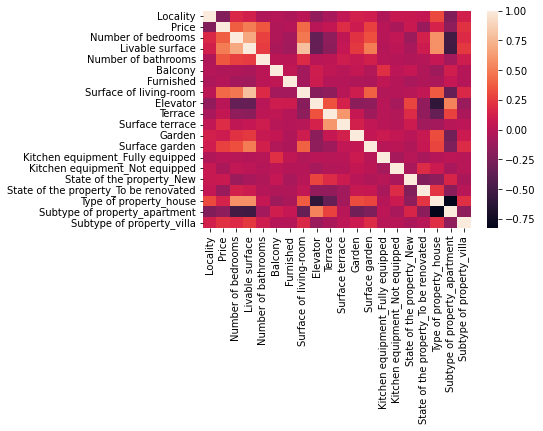

In [12]:
cor = df.corr()
ax = sns.heatmap(cor)

<AxesSubplot:xlabel='Livable surface', ylabel='Price'>

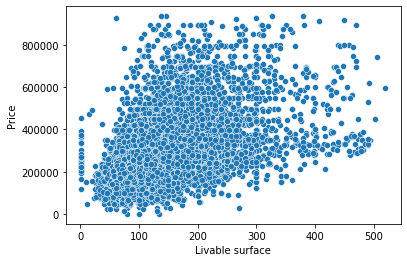

In [13]:
sns.scatterplot(data=df, x='Livable surface', y='Price')

In [67]:
#X = df.drop(columns=['Price']).to_numpy()
X = df[['Locality', 'Number of bedrooms', 'Livable surface']].to_numpy()
#X = df[['Surface garden', 'Number of bedrooms', 'Livable surface', 'Furnished']].to_numpy()
Y = df.Price.to_numpy().reshape(-1, 1)
print('X shape:', X.shape)
print('Y shape:', Y.shape)

X shape: (12691, 3)
Y shape: (12691, 1)


In [68]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)
#X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [69]:

print('X_train shape:', X_train.shape)
print('x_test shape:', x_test.shape)
print('Y_train shape:', Y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (10152, 3)
x_test shape: (2539, 3)
Y_train shape: (10152, 1)
y_test shape: (2539, 1)


In [70]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [71]:
reg.score(X_train, Y_train)

0.33631689914356366

In [72]:
reg.score(x_test, y_test)

0.3419206227601681

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 2

In [74]:
polyreg=make_pipeline(
    PolynomialFeatures(degree),
    LinearRegression(),
)

In [75]:

polyreg.fit(X_train, Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [76]:
x_test[0]

array([ 2.,  1., 65.])

In [77]:
polyreg.score(x_test,y_test)

0.3882171507151263

In [ ]:
import pickle
pickle.dump(polyreg, open('polyreg.pkl', 'wb'))

In [ ]:
[  2. ,   4.        , 230.        ,   1.        ,
         1.        ,   0.        ,  18.        ,   0.        ,
        67.3660318 ,  25.05796724,   0.        ,   3.        ,
         0.        ,   0.        ,  18.        ,   0.        ,
         0.        ,   1.        ,   0.        , 732.10305388,
        16.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   0.        ]

In [ ]:
df = pd.read_csv('final_data.csv')
df.columns

Index(['Unnamed: 0', 'Locality', 'Price', 'Number of bedrooms',
       'Livable surface', 'Number of bathrooms', 'Balcony', 'Furnished',
       'Surface of living-room', 'Elevator', 'Terrace', 'Surface terrace',
       'Access for disabled', 'Garden', 'Surface garden',
       'Kitchen equipment_Fully equipped', 'Kitchen equipment_Not equipped',
       'State of the property_New', 'State of the property_To be renovated',
       'Type of property_house', 'Subtype of property_apartment',
       'Subtype of property_villa'],
      dtype='object')